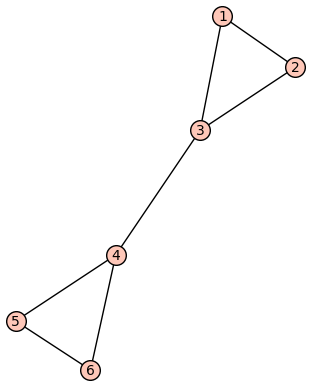

Found a vertex cover: {1, 2, 4, 5}


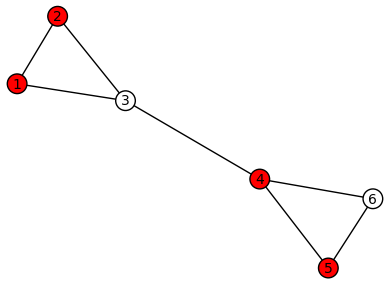

{1, 2, 4, 5}

In [1]:
def vertex_cover_recursive(G, k, cover=set()):
    # see if there is any edge that is not covered
    uncovered_edges = [e for e in G.edges(labels=False) if not (e[0] in cover or e[1] in cover)]
    if not uncovered_edges:
        return cover  # return current vertex cover

    if k <= 0:
        return None  # run out of budget but there still are edges left

    # select an edge from E
    u, v = uncovered_edges[0]

    # 尝试将u加入顶点覆盖集
    cover_with_u = vertex_cover_recursive(G, k - 1, cover.union({u}))
    if cover_with_u is not None:
        return cover_with_u
    
    # 尝试将v加入顶点覆盖集
    cover_with_v = vertex_cover_recursive(G, k - 1, cover.union({v}))
    if cover_with_v is not None:
        return cover_with_v
    
    # 如果u和v都不能导致有效的顶点覆盖，返回None
    return None

def vertex_cover(G, k):
    # 从空集开始，尝试找到最多包含k个顶点的顶点覆盖
    cover = vertex_cover_recursive(G, k)
    if cover is not None:
        print("Found a vertex cover:", cover)
        # 创建顶点颜色的映射：顶点覆盖集中的顶点为红色，其他顶点为默认颜色
        vertex_colors = {'red': list(cover), 'white': [v for v in G.vertices() if v not in cover]}
        # 显示图，其中顶点覆盖集中的顶点将以红色显示
        G.show(vertex_colors=vertex_colors)
        return cover
    else:
        print("No vertex cover found with", k, "vertices")
        return None

# 创建一个示例图
# G = graphs.PetersenGraph()
G = Graph([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4)])
show(G)
# 尝试找到包含k个顶点的顶点覆盖
vertex_cover(G, 4)